In [1]:
# Para no tener que reiniciar el kernel
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


In [2]:
import sys
sys.path.append("../../")

In [3]:
# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------

from src import soporte_ajuste_logistica as sal
from src import soporte_logistica_ensamble as sle


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_pickle('../../datos/modelo1/datos_preprocesados.pkl')

In [94]:
df.head()

,Attrition,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,EducationField,JobRole,...,Education_5.0,JobLevel_Head,JobLevel_Intern,JobLevel_Junior,JobLevel_Manager,JobLevel_Senior,StockOptionLevel_Bad,StockOptionLevel_Best,StockOptionLevel_Better,StockOptionLevel_Good
0,0.0,0.0,-0.9757428617518955,1.0,1.153846,0.0,-1.0,-0.083333,0.533045977011493,-0.4637062838161343,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.4248750185616,-0.384615,0.09952892067107169,0.0,0.250000,0.533045977011493,0.5238411596221293,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.7658035397332527,0.0,6.8505006797942904,-0.307692,0.09952892067107169,0.0,0.833333,-4.206791420725185,0.1773559143770109,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,-0.23419646026674737,-0.9757428617518955,0.0,0.153846,-0.06956855225311602,0.0,-0.416667,0.533045977011493,-0.7459473750454625,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,-0.23419646026674737,1.2600378155516458,0.0,-0.307692,0.0,0.0,0.250000,0.0,0.1773559143770109,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [95]:
df = df.astype(float)

### REGRESIÓN

In [98]:
logistica = sle.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_regresion = logistica.calcular_metricas(modelo_nombre = "logistic_regression")
df_resultados_regresion["modelo"] = "logistic_regression"
df_resultados_regresion

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.856039,0.832243,0.856039,0.820053,0.233733,0.806676,0.004009,NaN,NaN,NaN,logistic_regression
test,0.860412,0.843830,0.860412,0.829067,0.295012,0.814718,NaN,NaN,0.004009,NaN,logistic_regression


A pesar del acusado desbalanceo , la precisión y el recall nos dicen que predice  bien la clase minoritaria (la del Yes), en todo caso el peor dato de esta métrica es la kappa que es muy baja, y acerca el modelo al de la prediccion aleatoria.

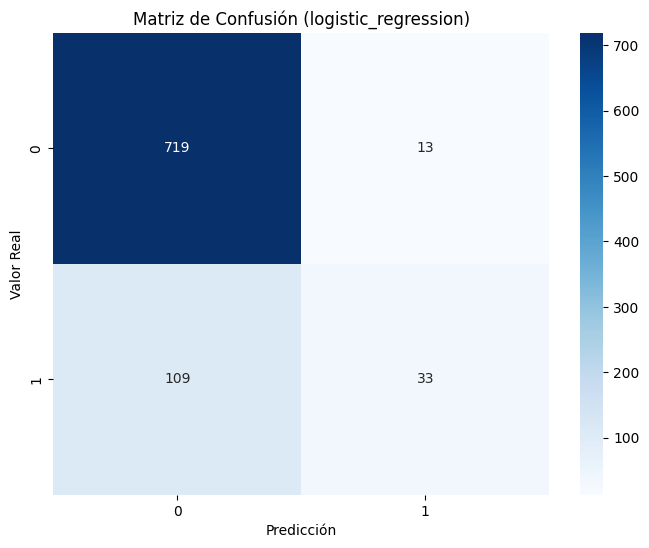

In [99]:
logistica.plot_matriz_confusion("logistic_regression")

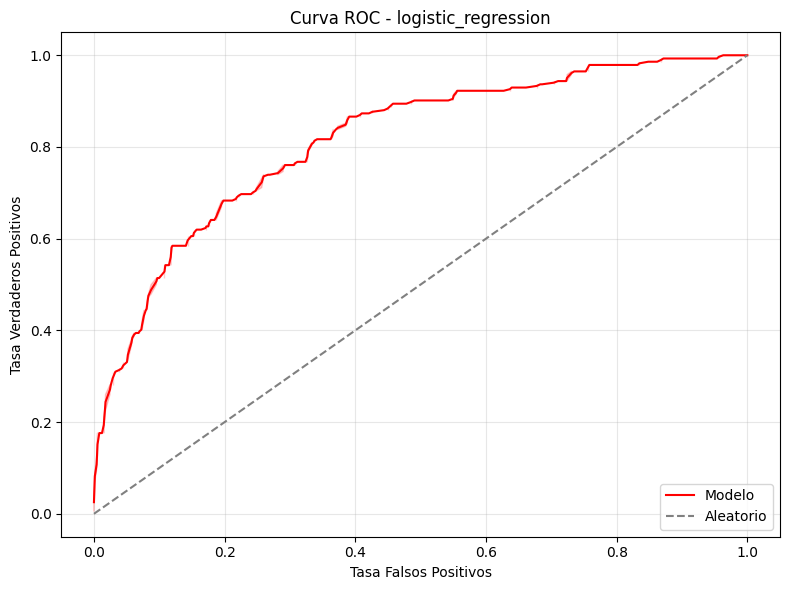

In [100]:
logistica.plot_curva_roc("logistic_regression")

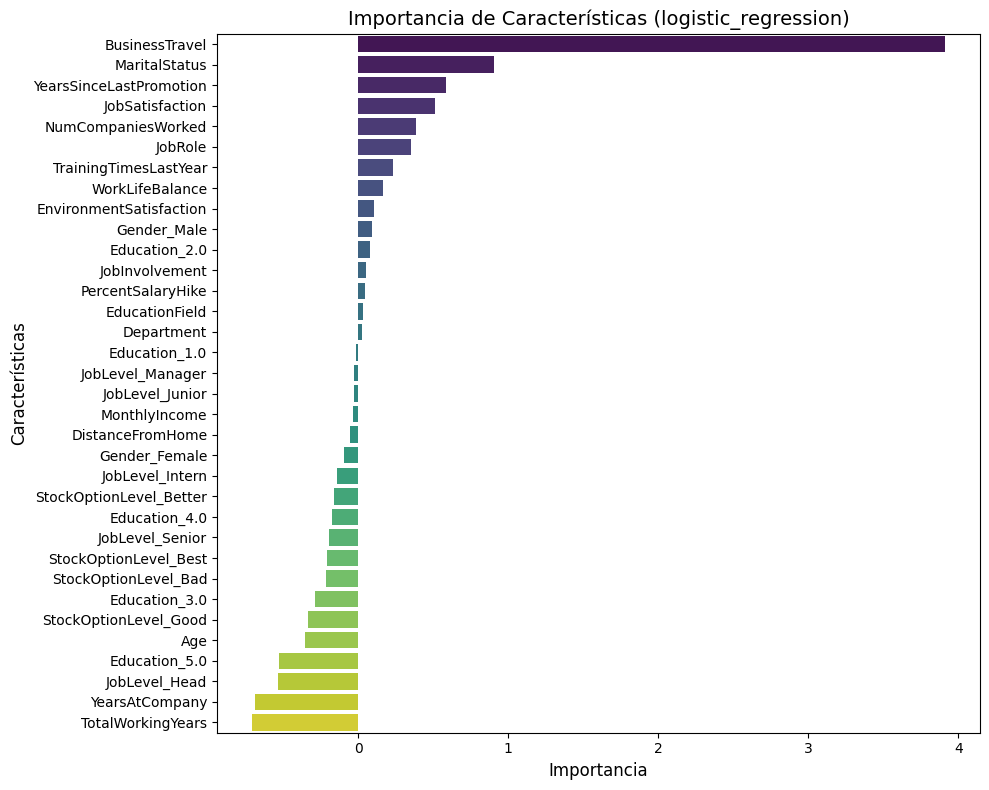

In [101]:
logistica.importancia_predictores("logistic_regression")

### DECISION TREE

In [102]:
logistica = sle.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("tree")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_tree = logistica.calcular_metricas(modelo_nombre = "tree")
df_resultados_tree["modelo"] = "tree"
df_resultados_tree 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
El mejor modelo es DecisionTreeClassifier(max_depth=10, random_state=42)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.954493,0.953722,0.954493,0.952708,0.815797,0.965826,0.003986,4.0,NaN,NaN,tree
test,0.933638,0.931468,0.933638,0.930135,0.731800,0.932574,NaN,NaN,0.003986,4.0,tree


En este modelo las metricas son francamente mejores, si acaso, la kappa del test es algo inferior a las otras, pero es un modelo, que pese al desbalanceo predice bastante bien positivos y negativos.

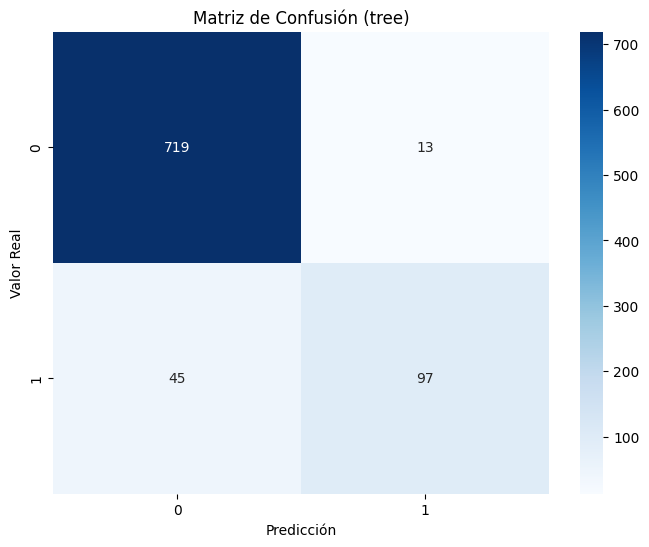

In [103]:
logistica.plot_matriz_confusion("tree")

Vemos que los verdaderos positivos y los verdaderos netativos son mayores que los falsos positivos y los falsos negativos

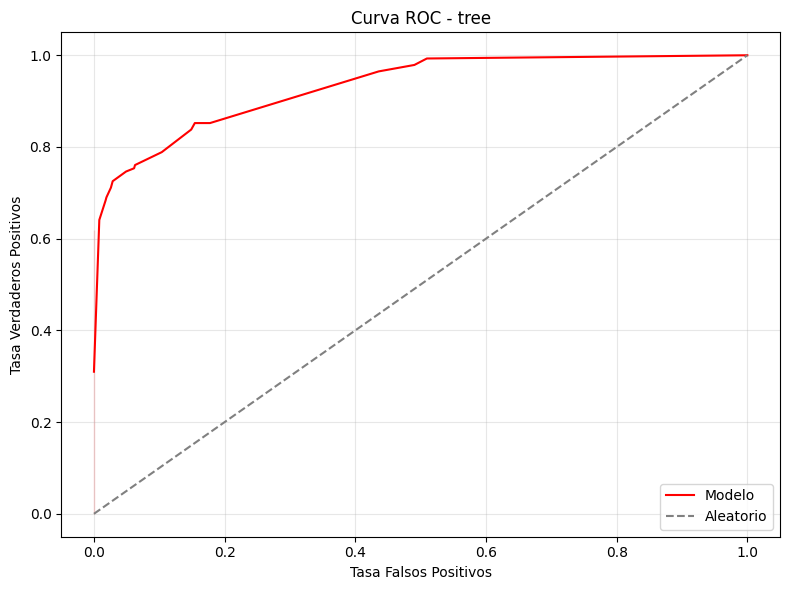

In [104]:
logistica.plot_curva_roc("tree")

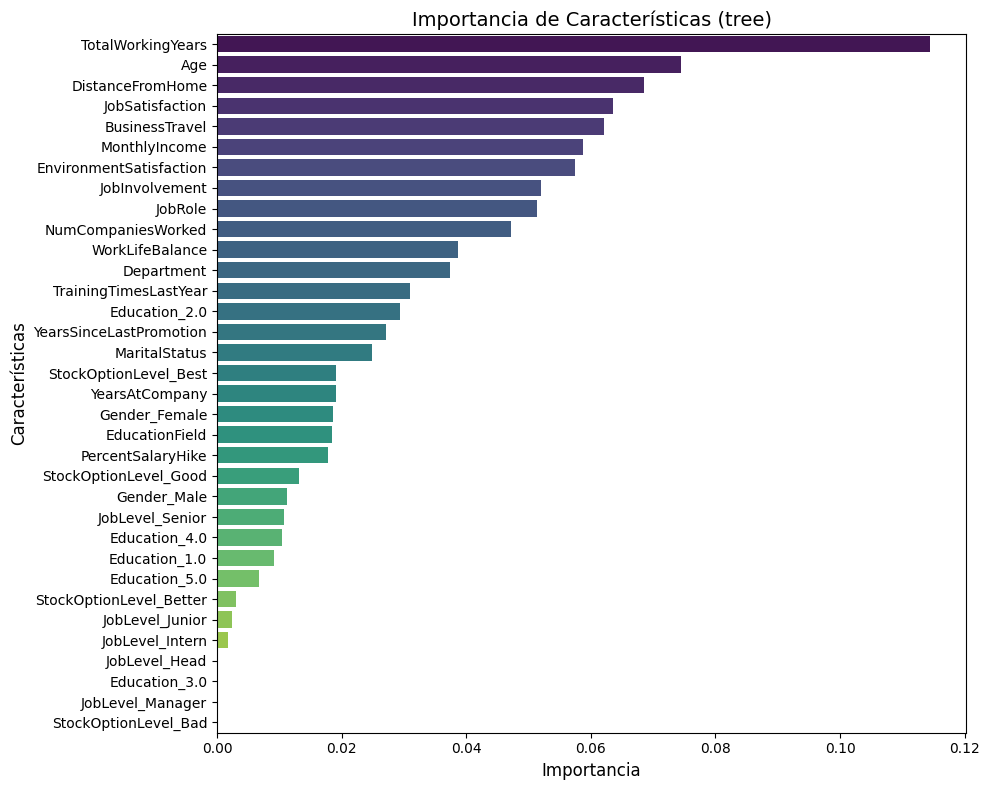

In [105]:
logistica.importancia_predictores("tree")

### RANDOM FOREST

In [114]:
logistica = sle.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("random_forest")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_rf = logistica.calcular_metricas(modelo_nombre = "random_forest")
df_resultados_rf["modelo"] = "random_forest"
df_resultados_rf 

Fitting 5 folds for each of 108 candidates, totalling 540 fits
El mejor modelo es RandomForestClassifier(max_depth=15, n_estimators=50, n_jobs=-1,
                       random_state=42)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.999428,0.999428,0.999428,0.999427,0.997842,1.000000,0.093356,-1.0,NaN,NaN,random_forest
test,0.994279,0.994318,0.994279,0.994238,0.978676,0.999942,NaN,NaN,0.093356,-1.0,random_forest


Estas métricas son extraordinarias. Todas por encima de 0,97. Pese al desbalanceo, los positivos y los negativos se detectan con mucha exatitud. La kappa tan alta demuestra que estamos muy lejos de la aleatoriedad.

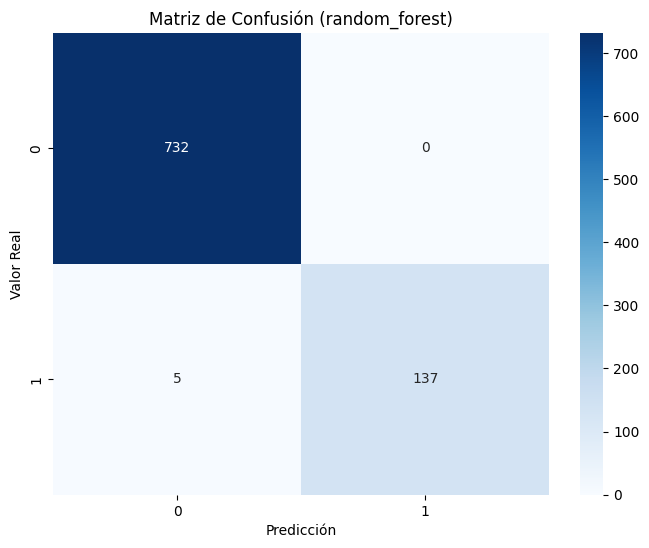

In [115]:
logistica.plot_matriz_confusion("random_forest")

La matriz evidencia la exactitud de la predicción con el random forest, no hay falsos positivos, y hay muy muy pocos falsos negativos.

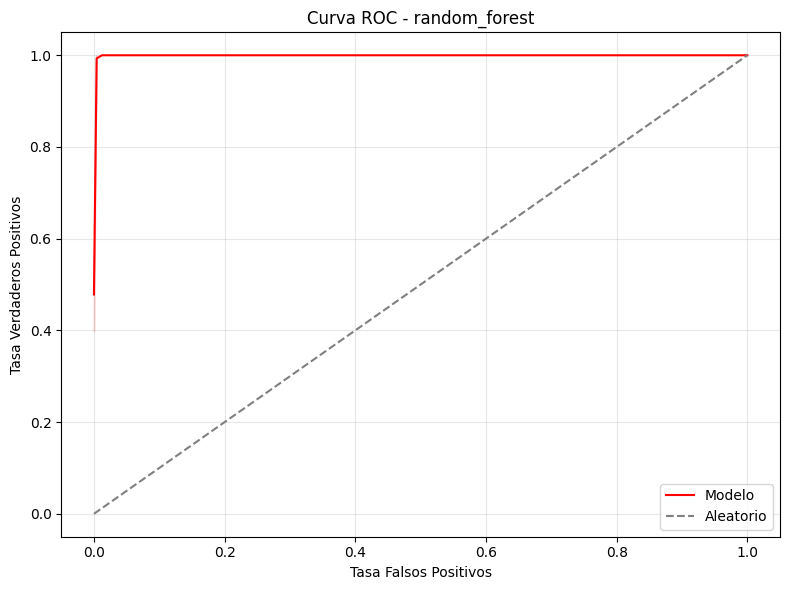

In [116]:
logistica.plot_curva_roc("random_forest")

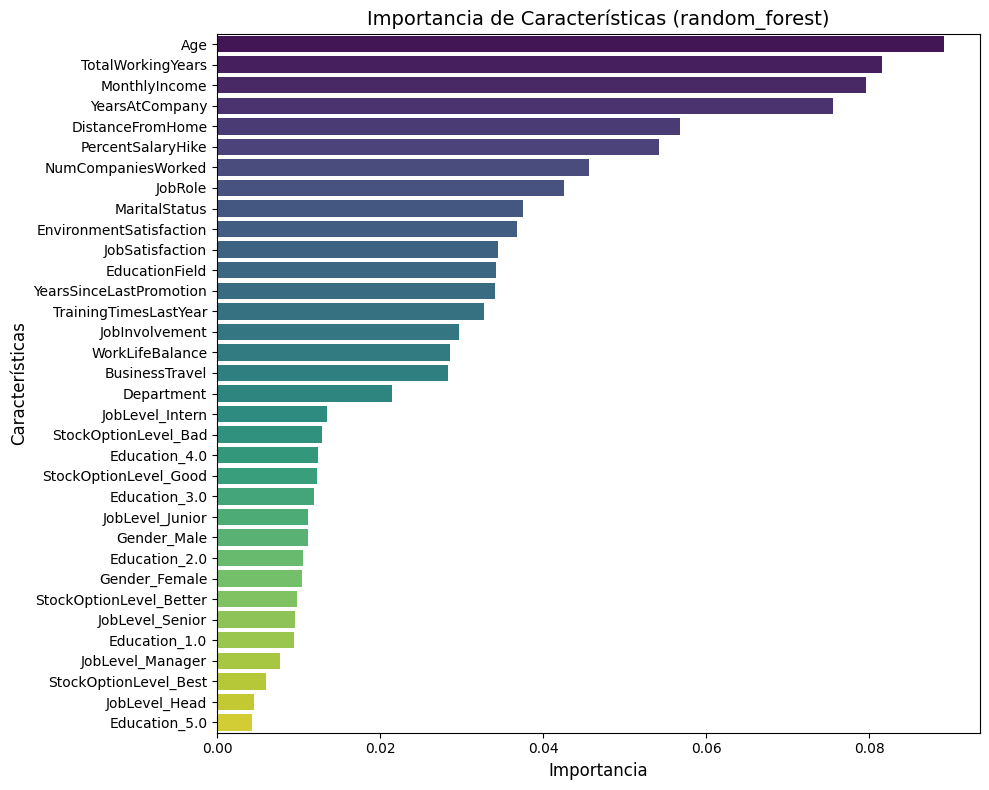

In [117]:
logistica.importancia_predictores("random_forest")

### Gradient Boosting

In [118]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("gradient_boosting")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_gb = logistica.calcular_metricas(modelo_nombre = "gradient_boosting")
df_resultados_gb["modelo"] = "gradient_boosting"
df_resultados_gb 

Fitting 5 folds for each of 144 candidates, totalling 720 fits
El mejor modelo es GradientBoostingClassifier(learning_rate=0.2, max_depth=4, min_samples_leaf=2,
                           min_samples_split=10, n_estimators=150,
                           random_state=42, subsample=0.8)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.999714,0.999714,0.999714,0.999714,0.998922,0.999983,0.023934,4.0,NaN,NaN,gradient_boosting
test,0.993135,0.993135,0.993135,0.993135,0.974775,0.999423,NaN,NaN,0.023934,4.0,gradient_boosting


Las métricas son muy buenas también, casi casi como las del Random Froest, pero el tiempo de ejecucción es muy superior, lo que hace que prefiramos el RandomForest

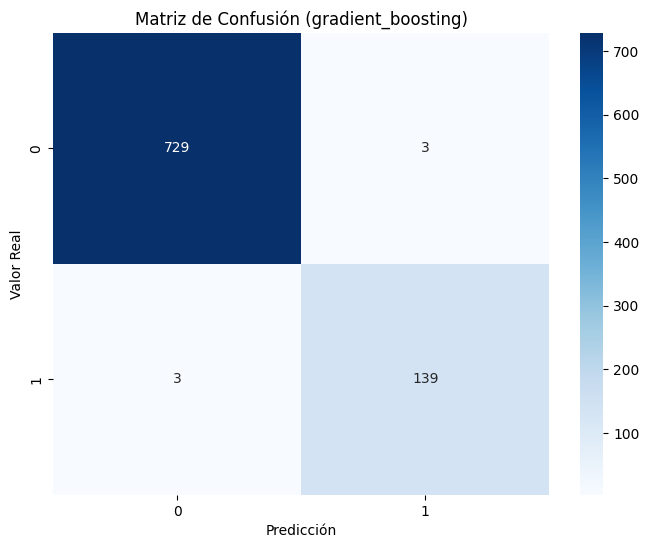

In [120]:
logistica.plot_matriz_confusion("gradient_boosting")

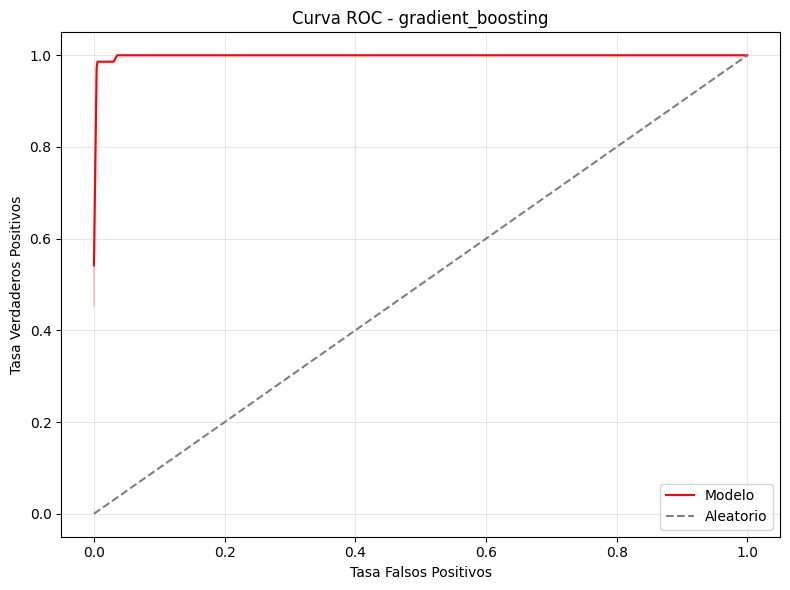

In [123]:
logistica.plot_curva_roc("gradient_boosting")

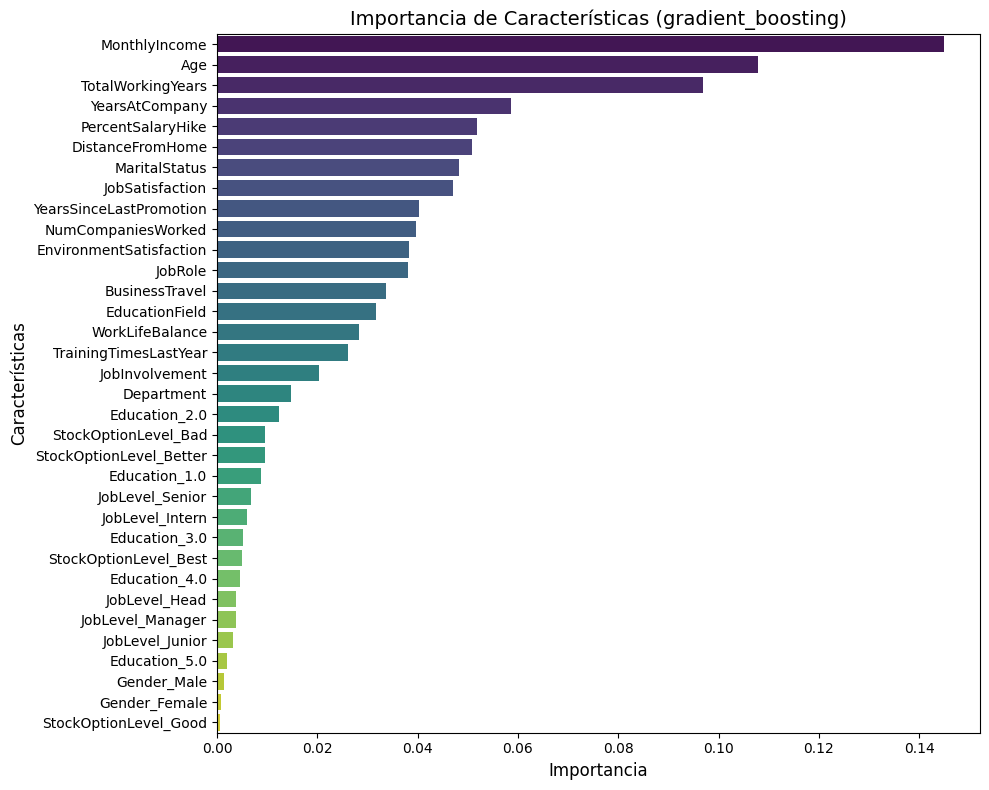

In [124]:
logistica.importancia_predictores("gradient_boosting")

La matriz muestra la calidad de la predicción en este caso, repartiendo por igual, con tan solo 3 los falsos positivos y los falsos negativos.

In [131]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("xgboost")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_xg = logistica.calcular_metricas(modelo_nombre = "xgboost")
df_resultados_xg["modelo"] = "xgboost"
df_resultados_xg 

Fitting 5 folds for each of 144 candidates, totalling 720 fits
El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.056849,NaN,NaN,NaN,xgboost
test,0.998856,0.998857,0.998856,0.998854,0.995784,1.0,NaN,NaN,0.056849,NaN,xgboost


Las métricas en el train son perfectas. Y en el test casi también. El tiempo de ejecución inferior a 2 minutos es asumible. Globalmente, es el mejor modelo.

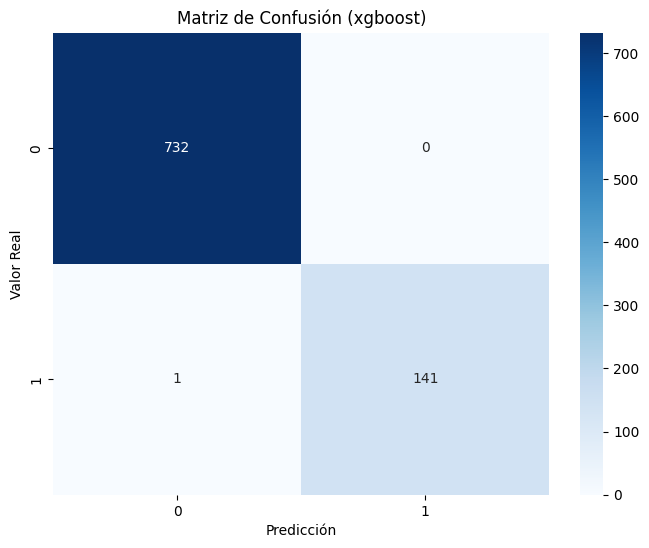

In [126]:
logistica.plot_matriz_confusion("xgboost")

No hay falsos positivos y solo un falso negativo, es decir, que de 732+141+1=873 valores que aparecen en la matriz solo predice mal uno. No está nada mal. No obstante, al final, daremos una interpretación global de por qué estos modelos son tan buenos (sospehosamente buenos) y que puede estar pasando.

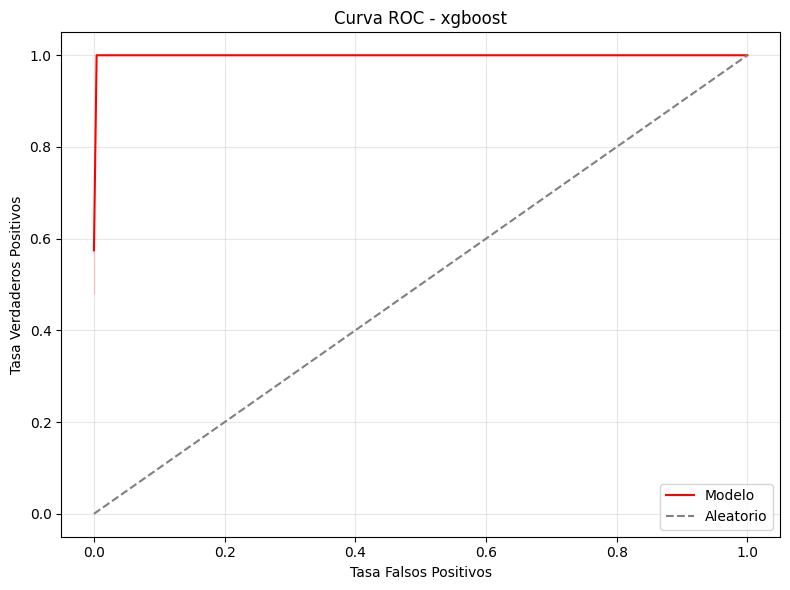

In [127]:
logistica.plot_curva_roc("xgboost")

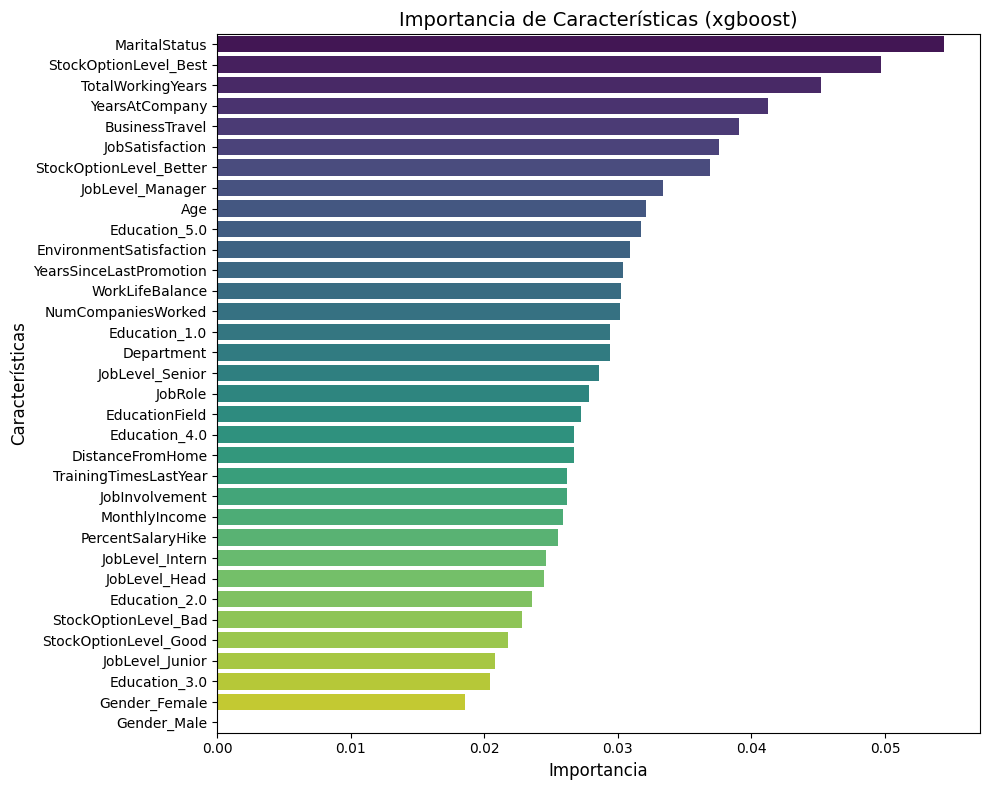

In [129]:
logistica.importancia_predictores("xgboost")

## CONCLUSIONES

In [132]:
df_resultados = pd.concat([df_resultados_regresion, df_resultados_tree, df_resultados_rf, df_resultados_gb, df_resultados_xg])
df_resultados.reset_index(drop=True, inplace=True)
df_resultados

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
0,0.856039,0.832243,0.856039,0.820053,0.233733,0.806676,0.004009,NaN,NaN,NaN,logistic_regression
1,0.860412,0.843830,0.860412,0.829067,0.295012,0.814718,NaN,NaN,0.004009,NaN,logistic_regression
2,0.954493,0.953722,0.954493,0.952708,0.815797,0.965826,0.003986,4.0,NaN,NaN,tree
3,0.933638,0.931468,0.933638,0.930135,0.731800,0.932574,NaN,NaN,0.003986,4.0,tree
4,0.999428,0.999428,0.999428,0.999427,0.997842,1.000000,0.093356,-1.0,NaN,NaN,random_forest
5,0.994279,0.994318,0.994279,0.994238,0.978676,0.999942,NaN,NaN,0.093356,-1.0,random_forest
6,0.999714,0.999714,0.999714,0.999714,0.998922,0.999983,0.023934,4.0,NaN,NaN,gradient_boosting
7,0.993135,0.993135,0.993135,0.993135,0.974775,0.999423,NaN,NaN,0.023934,4.0,gradient_boosting
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.056849,NaN,NaN,NaN,xgboost
9,0.998856,0.998857,0.998856,0.998854,0.995784,1.000000,NaN,NaN,0.056849,NaN,xgboost


El modelo predictivo es muy bueno, y particularmente con xg_boost se obtienen metricas casi perfectas. Sin embargo, hay dos razones que hacen que este modelo no sea el más adecuado para las predicciones y conclusiones que se nos piden en el proyecto.

1. Hay desbalanceo en la variable objetivo.

2. Una vez eliminado EmployeeId por ser irrelevane al análisis predictivo, nos quedan muchas filas de duplicados. En un empleo real, preguntariamos al cliente, al Ingeniero de datos que haya tratado estos datos previamente o a Recursos Humanos que ha podido pasar, pues parece algún tipo de error ya que es improbable dos empleados que coincidan en tantas características. Para nuestro proyecto, parece oportuno hacer un análisis considerando esos duplicados como si fuesen el mismo empleado, y por tanto eliminarlos, obteniendo así un modelo predicitvo más fiable.